In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

## Exercise 1

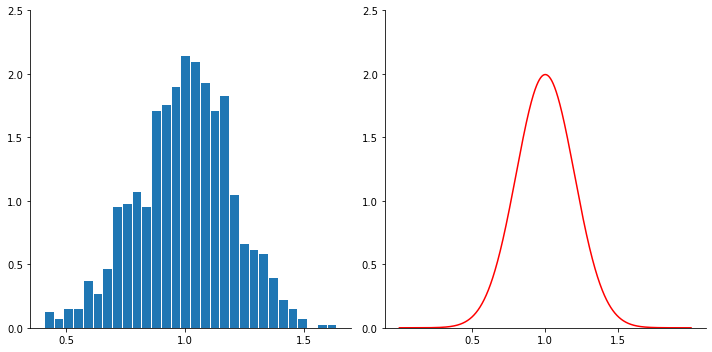

In [56]:
# create x values for ground truth data points (normally distributed)
x = np.arange(0, 2, 0.001)

# generate the sample data points with mean 1 and standard deviation 0.2 (normally distributed)
r = norm.rvs(size = 1000, loc = 1, scale = 0.2)

# creating diagrams
fig, axs = plt.subplots(1, 2,
                        tight_layout = True,
                        figsize=(10,5))

# plot 1: plot sample normal distribution with mean 1 and standard deviation 0.2
axs[0].hist(r, density = True, histtype = 'bar', bins = 30, rwidth=0.9)
axs[0].xaxis.set_ticks([0.5, 1, 1.5])
axs[0].yaxis.set_ticks([0, 0.5, 1, 1.5, 2, 2.5])
# hide the right and top spines
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

# plot 2: plot ground truth normal distribution with mean 1 and standard deviation 0.2
axs[1].plot(x, norm.pdf(x, 1, 0.2), color = 'red')
axs[1].xaxis.set_ticks([0.5, 1, 1.5])
axs[1].yaxis.set_ticks([0, 0.5, 1, 1.5, 2, 2.5])
# set zero on y axis to the bottom
axs[1].set_ylim(0)
# hide the right and top spines
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

plt.show()

## Exercise 2

In [4]:
# generate the ground truth data points (2D normally distributed)
x = np.linspace(-6, 6, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
mu = np.array([.5, -.2])
cov = np.array([[2.0, .3],[.3, .5]])
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)

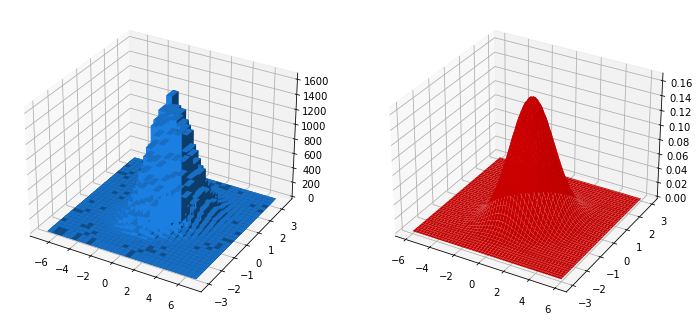

In [9]:
# generate the sample data points (2D normally distributed)
N_numbers = 100000
N_bins = 30

x, y = np.random.multivariate_normal(
        mean = [.5, -.2],
        cov = [[2.0, .3],
                [.3, .5]],
        size = N_numbers
        ).T     # transpose to get columns

# create diagrams
fig = plt.figure(figsize=(12, 7))

# plot 1: 2D historam
ax = fig.add_subplot(1, 2, 1, projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=N_bins)

# Construct arrays for the anchor positions of the bars.
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
# ypos in column-major order.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='dodgerblue', zsort='average')

# plot 2: 3D surface
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X, Y, Z, color = 'red')

# show the plot.
plt.show()

## Exercise 3

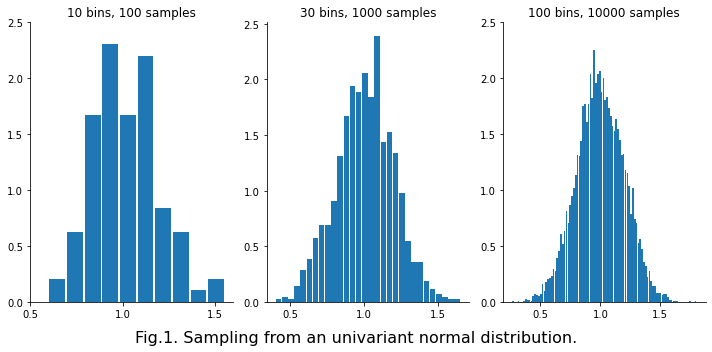

In [57]:
# generate the sample data points with mean 1 and standard deviation 0.2 (normally distributed)
r1 = norm.rvs(size = 100, loc = 1, scale = 0.2)
r2 = norm.rvs(size = 1000, loc = 1, scale = 0.2)
r3 = norm.rvs(size = 10000, loc = 1, scale = 0.2)

# creating diagrams
fig, axs = plt.subplots(1, 3,
                        tight_layout = True,
                        figsize=(10,5))

# plot 1: plot sample normal distribution with mean 1 and standard deviation 0.2
axs[0].hist(r1, density = True, histtype = 'bar', bins = 10, rwidth=0.9)
axs[0].set_title("10 bins, 100 samples")
axs[0].xaxis.set_ticks([0.5, 1, 1.5])
axs[0].yaxis.set_ticks([0, 0.5, 1, 1.5, 2, 2.5])
# hide the right and top spines
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

# plot 2: plot ground truth normal distribution with mean 1 and standard deviation 0.2
axs[1].hist(r2, density = True, histtype = 'bar', bins = 30, rwidth=0.9)
axs[1].set_title("30 bins, 1000 samples")
axs[1].xaxis.set_ticks([0.5, 1, 1.5])
axs[1].yaxis.set_ticks([0, 0.5, 1, 1.5, 2, 2.5])
# hide the right and top spines
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

# plot 3: plot ground truth normal distribution with mean 1 and standard deviation 0.2
axs[2].hist(r3, density = True, histtype = 'bar', bins = 100, rwidth=0.9)
axs[2].set_title("100 bins, 10000 samples")
axs[2].xaxis.set_ticks([0.5, 1, 1.5])
axs[2].yaxis.set_ticks([0, 0.5, 1, 1.5, 2, 2.5])
# hide the right and top spines
axs[2].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)

fig.suptitle('Fig.1. Sampling from an univariant normal distribution.', fontsize=16, y=0)
plt.show()

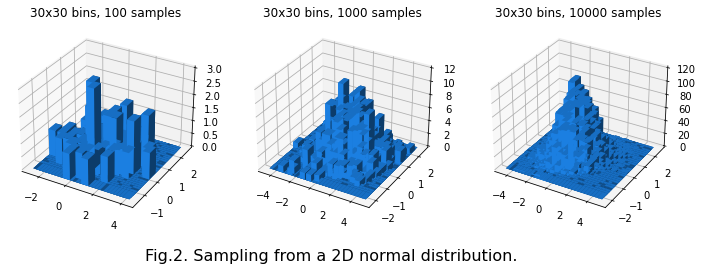

In [52]:
# generate the sample data points (2D normally distributed) with different sample size
x1, y1 = np.random.multivariate_normal(
        mean = [.5, -.2],
        cov = [[2.0, .3],
                [.3, .5]],
        size = 100
        ).T     # transpose to get columns

x2, y2 = np.random.multivariate_normal(
        mean = [.5, -.2],
        cov = [[2.0, .3],
                [.3, .5]],
        size = 1000
        ).T     # transpose to get columns

x3, y3 = np.random.multivariate_normal(
        mean = [.5, -.2],
        cov = [[2.0, .3],
                [.3, .5]],
        size = 10000
        ).T     # transpose to get columns



# create diagrams
fig = plt.figure(figsize=(12, 7))

# plot 1: 2D historam
ax = fig.add_subplot(1, 3, 1, projection = '3d')
ax.set_title("30x30 bins, 100 samples")
hist1, xedges1, yedges1 = np.histogram2d(x1, y1, bins = 30)

xpos1, ypos1 = np.meshgrid(xedges1[:-1] + 0.25, yedges1[:-1] + 0.25)
xpos1 = xpos1.flatten('F')
ypos1 = ypos1.flatten('F')
zpos1 = np.zeros_like(xpos1)

# Construct arrays with the dimensions for the 16 bars.
dx1 = 0.5 * np.ones_like(zpos1)
dy1 = dx1.copy()
dz1 = hist1.flatten()

ax.bar3d(xpos1, ypos1, zpos1, dx1, dy1, dz1, color='dodgerblue', zsort='average')

# plot 2: 2D historam
ax = fig.add_subplot(1, 3, 2, projection = '3d')
ax.set_title("30x30 bins, 1000 samples")
hist2, xedges2, yedges2 = np.histogram2d(x2, y2, bins = 30)

xpos2, ypos2 = np.meshgrid(xedges2[:-1] + 0.25, yedges2[:-1] + 0.25)
xpos2 = xpos2.flatten('F')
ypos2 = ypos2.flatten('F')
zpos2 = np.zeros_like(xpos2)

# Construct arrays with the dimensions for the 16 bars.
dx2 = 0.5 * np.ones_like(zpos2)
dy2 = dx2.copy()
dz2 = hist2.flatten()

ax.bar3d(xpos2, ypos2, zpos2, dx2, dy2, dz2, color='dodgerblue', zsort='average')

# plot 3: 2D historam
ax = fig.add_subplot(1, 3, 3, projection = '3d')
ax.set_title("30x30 bins, 10000 samples")
hist3, xedges3, yedges3 = np.histogram2d(x3, y3, bins = 30)

xpos3, ypos3 = np.meshgrid(xedges2[:-1] + 0.25, yedges2[:-1] + 0.25)
xpos3 = xpos3.flatten('F')
ypos3 = ypos3.flatten('F')
zpos3 = np.zeros_like(xpos3)

# Construct arrays with the dimensions for the 16 bars.
dx3 = 0.5 * np.ones_like(zpos3)
dy3 = dx3.copy()
dz3 = hist3.flatten()

ax.bar3d(xpos3, ypos3, zpos3, dx3, dy3, dz3, color='dodgerblue', zsort='average')

# show the plot.
fig.suptitle('Fig.2. Sampling from a 2D normal distribution.', fontsize=16, y=.25)
plt.show()